Ref. https://www.kaggle.com/omarelgabry/a-journey-through-rossmann-stores

In [1]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# get rossmann, store, & test csv files as a DataFrame
rossmann_df  = pd.read_csv("train.csv")
store_df     = pd.read_csv("store.csv")
test_df      = pd.read_csv("test.csv")


/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
rossmann_df.info()
print("----------------------------")
store_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-n

In [5]:
rossmann_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

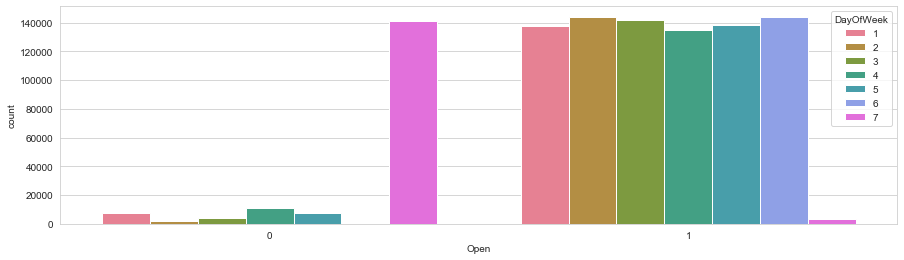

In [6]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=rossmann_df,palette="husl", ax=axis1)

# fill NaN values in test_df with Open=1 if DayOfWeek != 7
#test_df["Open"][test_df["Open"] != test_df["Open"]] = (test_df["DayOfWeek"] != 7).astype(int)

# Drop Open column
# rossmann_df.drop("Open", axis=1, inplace=True)
# test_df.drop("Open", axis=1, inplace=True)

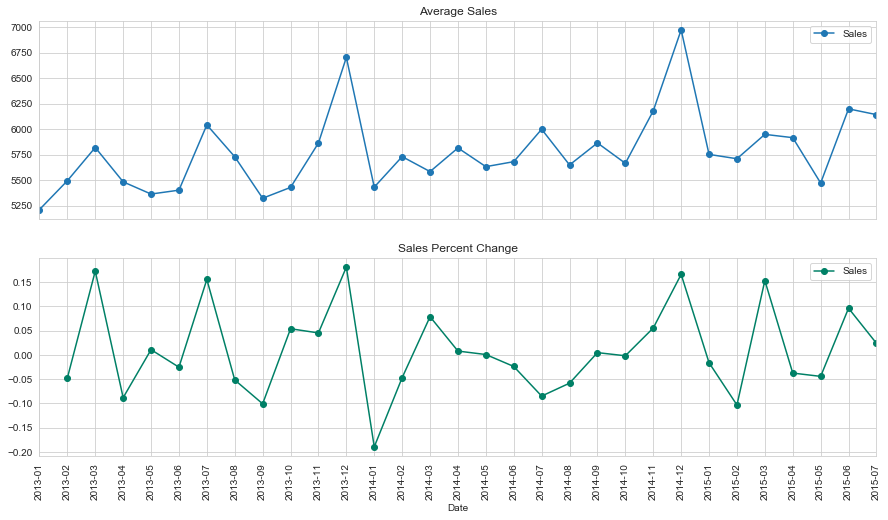

In [7]:
# Date

# Create Year and Month columns
rossmann_df['Year']  = rossmann_df['Date'].apply(lambda x: int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: int(str(x)[5:7]))

test_df['Year']  = test_df['Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Date'].apply(lambda x: int(str(x)[5:7]))

# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda x: (str(x)[:7]))
test_df['Date']     = test_df['Date'].apply(lambda x: (str(x)[:7]))

# group by date and get average sales, and precent change
average_sales    = rossmann_df.groupby('Date')["Sales"].mean()
pct_change_sales = rossmann_df.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

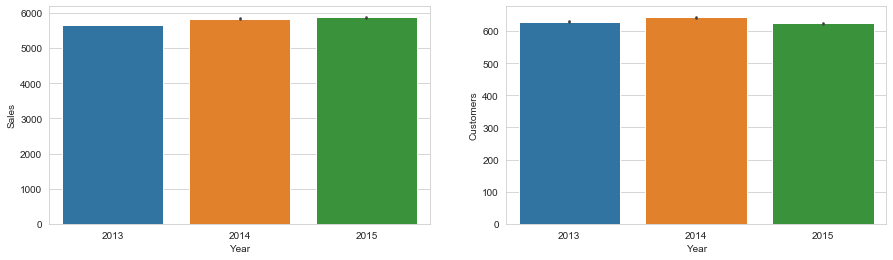

In [8]:
# .... contiune with Date

# Plot average sales & customers for every year
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Year', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='Year', y='Customers', data=rossmann_df, ax=axis2)

# Drop Date column
# rossmann_df.drop(['Date'], axis=1,inplace=True)
# test_df.drop(['Date'], axis=1,inplace=True)

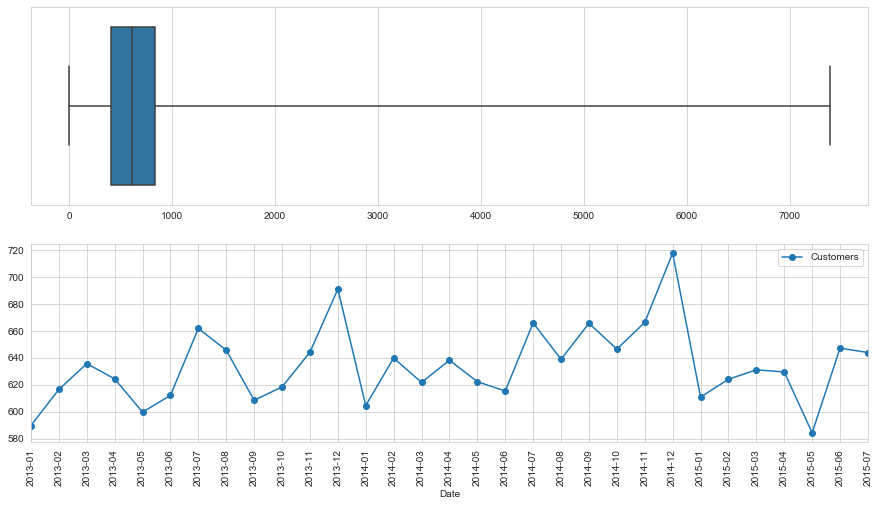

In [9]:
# Customers

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([rossmann_df["Customers"]], whis=np.inf, ax=axis1)

# group by date and get average customers, and precent change
average_customers      = rossmann_df.groupby('Date')["Customers"].mean()
# pct_change_customers = rossmann_df.groupby('Date')["Customers"].sum().pct_change()

# Plot average customers over the time
# it should be correlated with the average sales over time
ax = average_customers.plot(legend=True,marker='o', ax=axis2)
ax.set_xticks(range(len(average_customers)))
xlabels = ax.set_xticklabels(average_customers.index.tolist(), rotation=90)

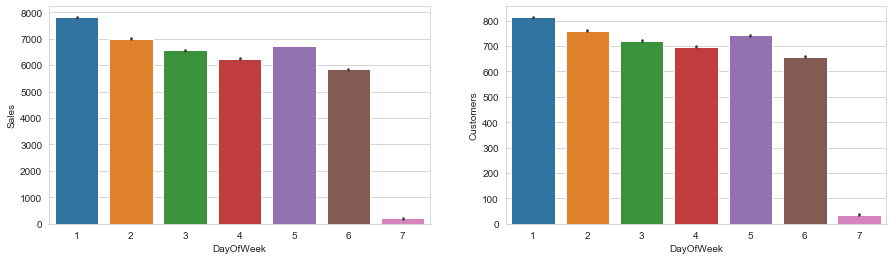

In [10]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=rossmann_df, order=[1,2,3,4,5,6,7], ax=axis2)

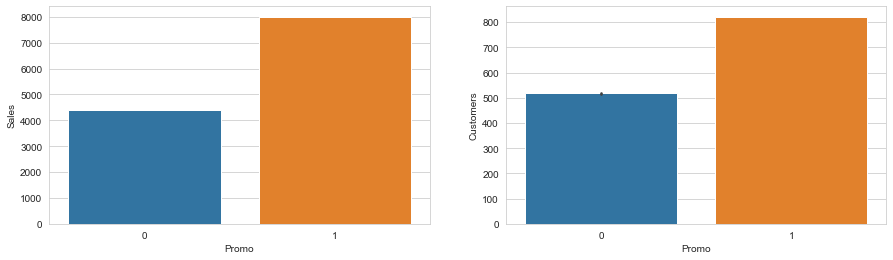

In [11]:
# Promo

# Plot average sales & customers with/without promo
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=rossmann_df, ax=axis2)

/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


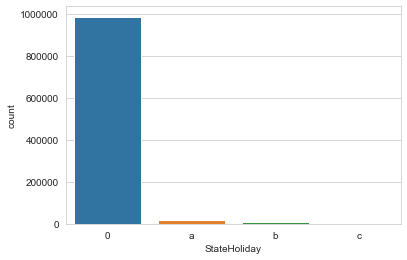

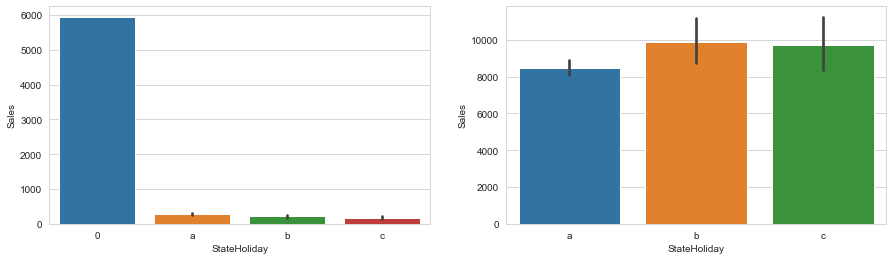

In [12]:
# StateHoliday

# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
rossmann_df["StateHoliday"].loc[rossmann_df["StateHoliday"] == 0] = "0"
# test_df["StateHoliday"].loc[test_df["StateHoliday"] == 0] = "0"

# Plot
sns.countplot(x='StateHoliday', data=rossmann_df)

# Before
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=rossmann_df, ax=axis1)

mask = (rossmann_df["StateHoliday"] != "0") & (rossmann_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=rossmann_df[mask], ax=axis2)

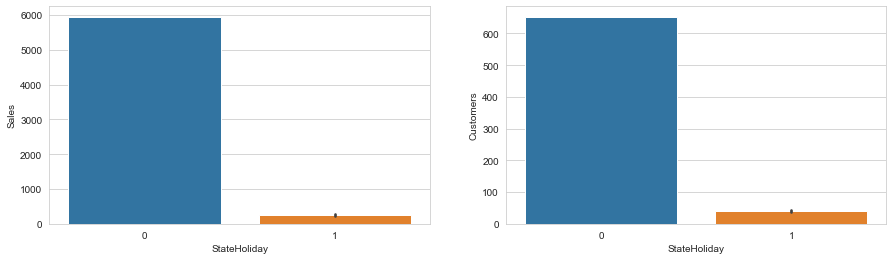

In [13]:
# .... continue with StateHoliday

# After
rossmann_df["StateHoliday"] = rossmann_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test_df["StateHoliday"]     = test_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StateHoliday', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=rossmann_df, ax=axis2)


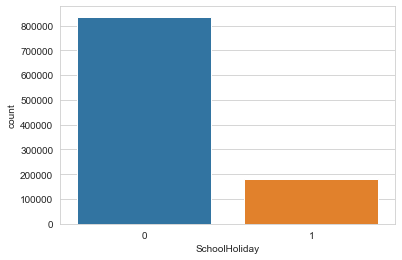

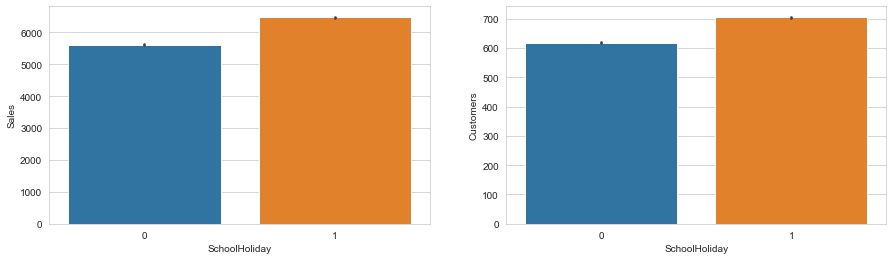

In [14]:
# SchoolHoliday

# Plot
sns.countplot(x='SchoolHoliday', data=rossmann_df)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=rossmann_df, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=rossmann_df, ax=axis2)

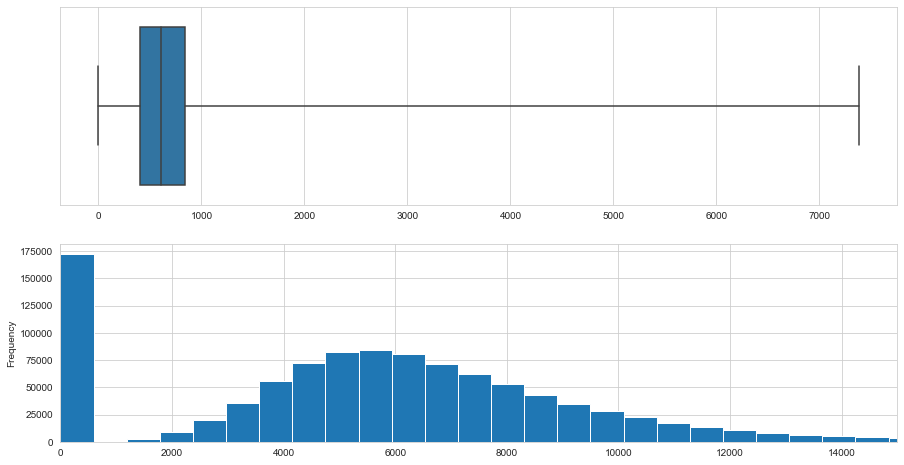

In [15]:
# Sales

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([rossmann_df["Customers"]], whis=np.inf, ax=axis1)

# Plot sales values 
# Notice that values with 0 is mostly because the store was closed
rossmann_df["Sales"].plot(kind='hist',bins=70,xlim=(0,15000),ax=axis2)

In [16]:
# Using store_df

# Merge store_df with average store sales & customers
average_sales_customers = rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()
sales_customers_df = DataFrame({'Store':average_sales_customers.index,
                      'Sales':average_sales_customers["Sales"], 'Customers': average_sales_customers["Customers"]}, 
                      columns=['Sales', 'Customers'])
#sales_customers_df.reset_index(inplace=True)
store_df = pd.merge(sales_customers_df, store_df, on='Store')

store_df.head()

,Store,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3945.704883,467.646497,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4122.991507,486.045648,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5741.253715,620.286624,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,8021.769639,1100.057325,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3867.110403,444.360934,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


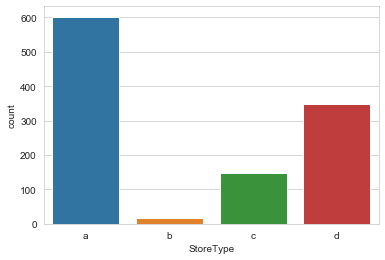

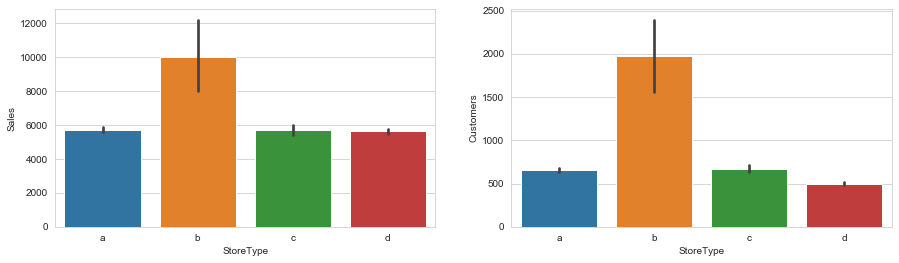

In [17]:
# StoreType 

# Plot StoreType, & StoreType Vs average sales and customers

sns.countplot(x='StoreType', data=store_df, order=['a','b','c', 'd'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='StoreType', y='Sales', data=store_df, order=['a','b','c', 'd'],ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=store_df, order=['a','b','c', 'd'], ax=axis2)

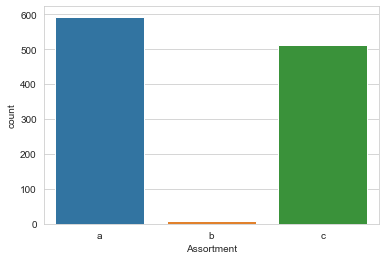

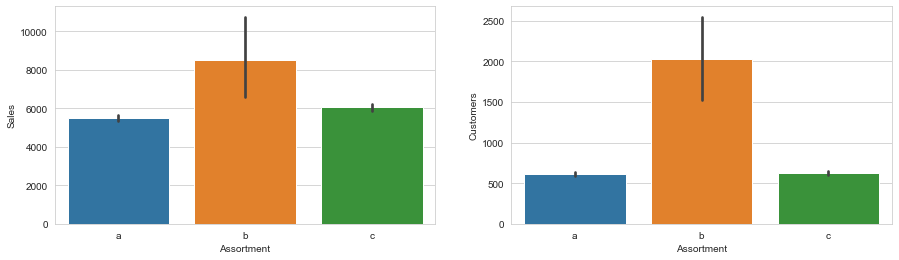

In [18]:
# Assortment 

# Plot Assortment, & Assortment Vs average sales and customers

sns.countplot(x='Assortment', data=store_df, order=['a','b','c'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=store_df, order=['a','b','c'], ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=store_df, order=['a','b','c'], ax=axis2)

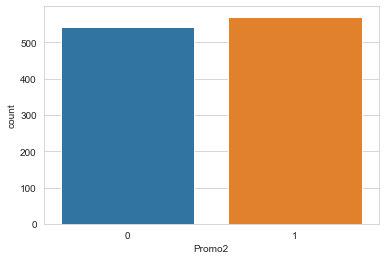

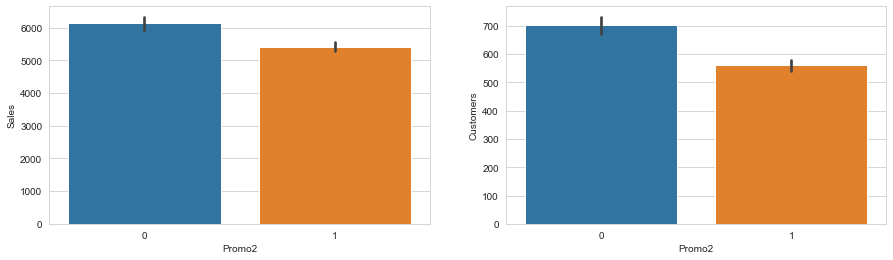

In [19]:
# Promo2

# Plot Promo2, & Promo2 Vs average sales and customers

sns.countplot(x='Promo2', data=store_df)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=store_df, ax=axis1)
sns.barplot(x='Promo2', y='Customers', data=store_df, ax=axis2)

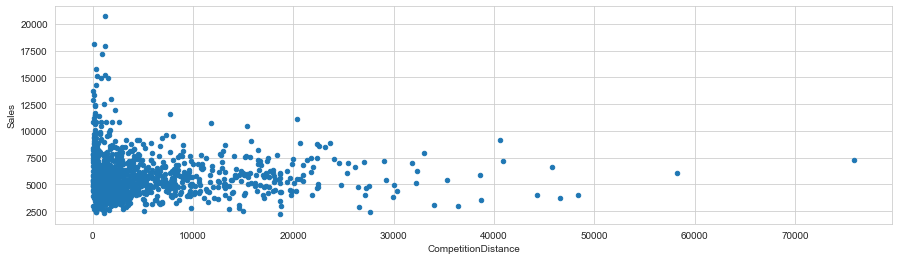

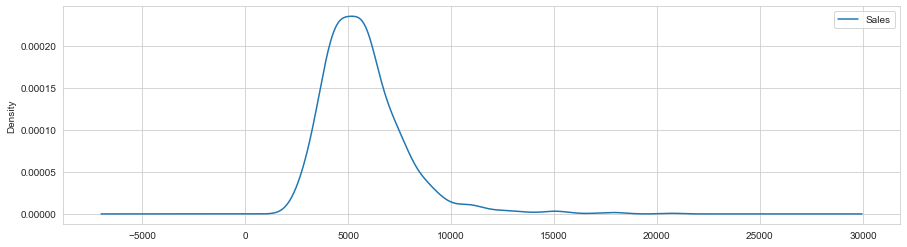

In [20]:
# CompetitionDistance

# fill NaN values
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median())

# Plot CompetitionDistance Vs Sales
store_df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
store_df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

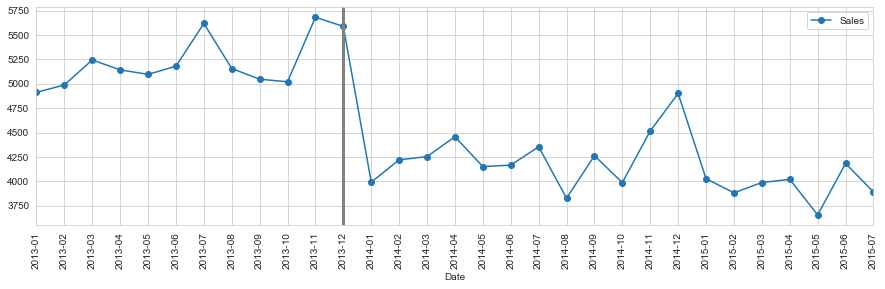

In [21]:
# What happened to the average sales of a store over time when competition started?
# Example: the average sales for store_id = 6 has dramatically decreased since the competition started

store_id = 6
store_data = rossmann_df[rossmann_df["Store"] == store_id]

average_store_sales = store_data.groupby('Date')["Sales"].mean()

# Get year, and month when Competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

# Since all data of store sales given in rossmann_df starts with year=2013 till 2015,
# So, we need to check if year>=2013 and y & m aren't NaN values.
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')

Text(50, 50, 'Store 6')

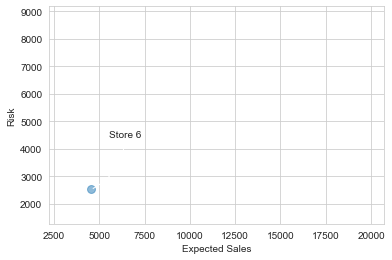

In [22]:
# Risk Analysis
# Analyze the risk of a store; Risk(std) Vs Expected(mean)

# .... countiue using store_data
store_average = store_data["Sales"].mean()
store_std     = store_data["Sales"].std()

# Plot
plt.scatter(store_average, store_std,alpha = 0.5,s =np.pi*20)

# Get min & max mean and std of store sales
# Remember that store_df["Sales"] has the average sales for a store
std_sales = rossmann_df.groupby('Store')["Sales"].std()

min_average = store_df["Sales"].min()
max_average = store_df["Sales"].max()
min_std     = std_sales.min()
max_std     = std_sales.max()

# Set the x and y limits of the plot
plt.ylim([min_std, max_std])
plt.xlim([min_average, max_average])

# Set the plot axis titles
plt.xlabel('Expected Sales')
plt.ylabel('Risk')

# Set label
label, x, y = "Store {}".format(store_id), store_average, store_std
plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


In [23]:
# Correlation
# Visualize the Correlation between stores

store_piv       = pd.pivot_table(rossmann_df,values='Sales', index='Date', columns=['Store'],aggfunc='sum')
store_pct_chage = store_piv.pct_change().dropna()
store_piv.head()

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01,128431.0,115171.0,165653.0,234713.0,109442.0,152265.0,188032.0,122293.0,127016.0,130042.0,...,115116.0,143763.0,143571.0,119190.0,106800.0,128626.0,304489.0,155879.0,456530.0,116482.0
2013-02,125271.0,111114.0,160167.0,230473.0,101126.0,139655.0,178830.0,119828.0,126826.0,122956.0,...,107923.0,140576.0,127544.0,115328.0,99489.0,122822.0,301544.0,147817.0,446745.0,123114.0
2013-03,145169.0,130525.0,189179.0,255514.0,116860.0,162550.0,213082.0,135408.0,143583.0,133609.0,...,124035.0,170060.0,148065.0,124393.0,116539.0,138298.0,312362.0,171412.0,516987.0,155033.0
2013-04,118009.0,116878.0,172188.0,226981.0,106141.0,154269.0,197381.0,127236.0,136194.0,131040.0,...,110478.0,154915.0,132135.0,118303.0,106745.0,131652.0,284870.0,148796.0,497336.0,126212.0
2013-05,118225.0,116379.0,170374.0,235284.0,110292.0,157972.0,210921.0,126886.0,136540.0,130642.0,...,111092.0,151585.0,131119.0,117329.0,105277.0,128784.0,284762.0,155649.0,503359.0,131329.0


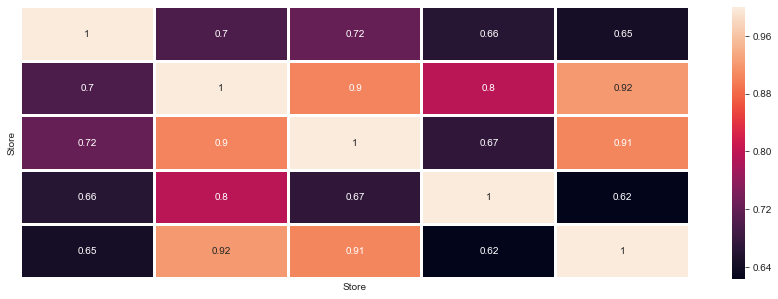

In [28]:
# .... continue Correlation

# Plot correlation between range of stores
start_store = 1
end_store   = 5

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# using summation of sales values for each store 
sns.heatmap(store_piv[list(range(start_store, end_store+1))].corr(),annot=True,linewidths=2,
            xticklabels=False, yticklabels=False) # This line added for displaying the heatmap completely

# using percent change for each store
# sns.heatmap(store_pct_chage[list(range(start_store, end_store+1))].corr(),annot=True,linewidths=2)

In [32]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07,5263,555,1,1,0,1,2015,7
1,2,5,2015-07,6064,625,1,1,0,1,2015,7
2,3,5,2015-07,8314,821,1,1,0,1,2015,7
3,4,5,2015-07,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07,4822,559,1,1,0,1,2015,7


In [33]:
# Notice that test_df has only year=2015, and months 8 & 9

# drop Year and Month
rossmann_df.drop(["Year", "Month"], axis=1, inplace=True)
test_df.drop(["Year", "Month"], axis=1, inplace=True)

# Create dummy varibales for DayOfWeek
day_dummies_rossmann  = pd.get_dummies(rossmann_df['DayOfWeek'], prefix='Day')
day_dummies_rossmann.drop(['Day_7'], axis=1, inplace=True)

day_dummies_test  = pd.get_dummies(test_df['DayOfWeek'],prefix='Day')
day_dummies_test.drop(['Day_7'], axis=1, inplace=True)

rossmann_df = rossmann_df.join(day_dummies_rossmann)
test_df     = test_df.join(day_dummies_test)

rossmann_df.drop(['DayOfWeek'], axis=1,inplace=True)
test_df.drop(['DayOfWeek'], axis=1,inplace=True)

In [34]:
rossmann_df.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1,2015-07,5263,555,1,1,0,1,0,0,0,0,1,0
1,2,2015-07,6064,625,1,1,0,1,0,0,0,0,1,0
2,3,2015-07,8314,821,1,1,0,1,0,0,0,0,1,0
3,4,2015-07,13995,1498,1,1,0,1,0,0,0,0,1,0
4,5,2015-07,4822,559,1,1,0,1,0,0,0,0,1,0


In [35]:
# remove all rows(store,date) that were closed
rossmann_df = rossmann_df[rossmann_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
rossmann_df.drop(["Open","Customers", "Date"], axis=1, inplace=True)

In [36]:
# save ids of closed stores, because we will assign their sales value to 0 later(see below)
closed_store_ids = test_df["Id"][test_df["Open"] == 0].values

# remove all rows(store,date) that were closed
test_df = test_df[test_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
test_df.drop(['Open', 'Date'], axis=1,inplace=True)

In [ ]:
# Loop through each store, 
# train the model using the data of current store, and predict it's sales values.

rossmann_dic = dict(list(rossmann_df.groupby('Store')))
test_dic     = dict(list(test_df.groupby('Store')))
submission   = Series()
scores       = []

for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    Y_pred = lreg.predict(X_test)
    scores.append(lreg.score(X_train, Y_train))


In [ ]:
scores

In [ ]:
X_train.head()